In [11]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

embeddings_dict = {}
with open("glove.6B.50d.txt", "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector


In [15]:
tsne = TSNE(n_components=2, random_state=0)

# words =  np.array(embeddings_dict.keys())
# vectors = [embeddings_dict[word] for word in words]
# Y = tsne.fit_transform(vectors[:1000])
# plt.scatter(Y[:, 0], Y[:, 1])

# for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
# plt.show()
df

,id,created_at,title,summary,experience,author,contact,verified_by_expert,filtered,difficulty,...,mentorship_from,user,career_difficulty,project_factory,finished,finished_link,finished_date,hypothesis,x1,y1
0,138,2022-11-01 02:56:12.672888+00,Fine-tuning is just rewiring and upweighting v...,"E.g, finetune GPT-2 Small on Wikipedia. Compar...",NaN,Neel Nanda,NaN,False,True,0.0,...,NaN,0ab224d1-75b6-44e5-b868-26018ca607fe,NaN,False,False,NaN,NaN,True,NaN,NaN
1,137,2022-10-30 21:13:12.192844+00,"An LLM prompted to be ""X and truthful"" will be...",This is an expansion of idea #131 (see below)....,NaN,Gurkenglas,NaN,False,True,0.0,...,NaN,0ab224d1-75b6-44e5-b868-26018ca607fe,NaN,False,False,NaN,NaN,True,NaN,NaN
2,136,2022-10-30 15:01:25.674178+00,Complicated models are harder to evaluate and ...,As systems become more complicated we expect t...,NaN,"Rohin Shah, Vikrant Varma",NaN,False,True,0.0,...,NaN,2ec7205d-9fe5-4df3-811d-6779e0af67bc,NaN,False,False,NaN,NaN,True,NaN,NaN
3,135,2022-10-30 14:51:47.298139+00,Shortest and not the steepest path will fix th...,Replacing the 'stochastic gradient descent' SG...,NaN,Thane Ruthenis,NaN,False,True,0.0,...,NaN,2ec7205d-9fe5-4df3-811d-6779e0af67bc,NaN,False,False,NaN,NaN,False,NaN,NaN
4,134,2022-10-30 12:18:07.375711+00,Warning shots / slow takeoff might help reduce...,Warning shots / slow takeoff might help reduce...,NaN,Steven Byrnes,steven.byrnes@gmail.com,False,True,0.0,...,NaN,2ec7205d-9fe5-4df3-811d-6779e0af67bc,NaN,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,2022-05-23 22:56:36.437854+00,Find domain dependence of InstructGPT's truthf...,Consider questions where the most common answe...,NaN,Sam Bowman,NaN,False,True,NaN,...,NaN,0ab224d1-75b6-44e5-b868-26018ca607fe,"{""value"":""Student"",""label"":""Student""}",False,False,NaN,NaN,False,NaN,NaN
96,18,2022-05-23 22:53:27.337776+00,Create simple RL environments that illustrate ...,E.g. environments with a broad distribution of...,NaN,Yonadav Shavit,NaN,False,True,NaN,...,NaN,0ab224d1-75b6-44e5-b868-26018ca607fe,"{""value"":""Signal"",""label"":""Hard project with a...",False,False,NaN,NaN,False,NaN,NaN
97,17,2022-05-23 22:50:52.833627+00,Argue why interpretability is useful for long-...,"This would partially answer the question ""What...",NaN,Holden Karnofsky,NaN,False,True,NaN,...,NaN,0ab224d1-75b6-44e5-b868-26018ca607fe,"{""value"":""Student"",""label"":""Student""}",False,False,NaN,NaN,False,NaN,NaN
98,16,2022-05-23 22:46:00.981909+00,Make a steelman argument against AI safety,There hasn't been a lot of very solid argument...,NaN,NaN,NaN,False,True,NaN,...,NaN,0ab224d1-75b6-44e5-b868-26018ca607fe,"{""value"":""Signal"",""label"":""Hard project with a...",False,False,NaN,NaN,False,NaN,NaN


In [29]:
import umap.umap_ as umap
reducer = umap.UMAP()

df = pd.read_csv("ideas_rows.csv")

df['text'] = [str(r[2]) + str(r[3]) + str(r[5]) for index, r in df.iterrows()]

def get_vector(text):
    words = text.split()
    vectors = [embeddings_dict[word] for word in words if word in embeddings_dict]
    return np.mean(vectors, axis=0)

In [31]:
vectors = [get_vector(text) for text in df['text']]
red = reducer.fit_transform(vectors)


In [36]:
df['x'] = red[:, 0]
df['y'] = red[:, 1]

<AxesSubplot:xlabel='x', ylabel='y'>

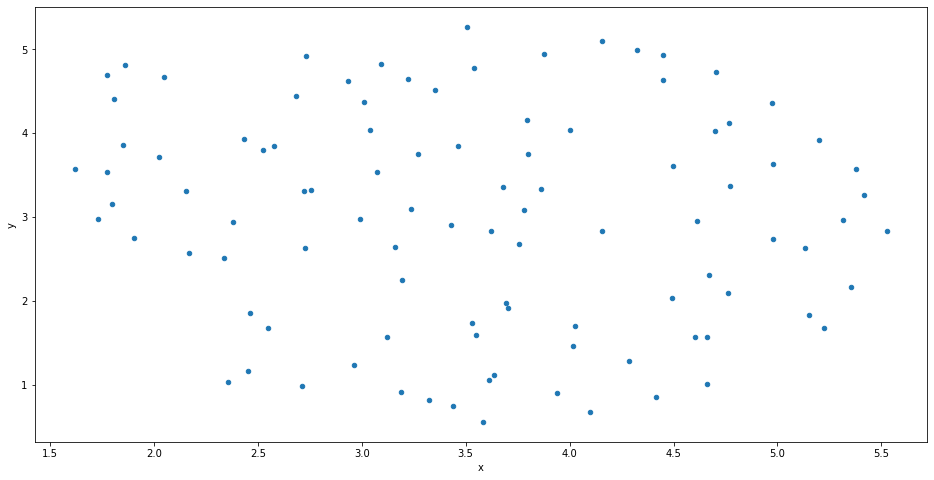

In [37]:
df.plot(kind='scatter', x='x', y='y', figsize=(16, 8))

In [40]:
import os
from supabase import create_client, Client

url: str = ""
key: str = ""
supabase: Client = create_client(url, key)

In [43]:
# Update the records in the table with x and y coordinates
for index, r in df.iterrows():
    print(r['id'])
    response = supabase.table('ideas').update({
        'x1': r['x'],
        'y1': r['y']
    }).eq('id', r['id']).execute()
    print(response)

# data = supabase.table("countries").update({"country": "Indonesia", "capital_city": "Jakarta"}).eq("id", 1).execute()

138
data=[{'id': 138, 'created_at': '2022-11-01T02:56:12.672888+00:00', 'title': 'Fine-tuning is just rewiring and upweighting vs downweighting circuits that already exist, rather than building new circuits.', 'summary': "E.g, finetune GPT-2 Small on Wikipedia. Compare the model's internal activations before and after, compare attention patterns, etc.\xa0\n\n## What happens when you fine-tune a model?\n\nHow does model performance change on other text? Are specific circuits harmed or is worse across the board?\n\nHypothesis: Fine-tuning is just rewiring and upweighting vs downweighting circuits that already exist, rather than building new circuits.\n\n-   A similar hard problem is examining what happens with chain of thought prompting. That, though, is really hard because chain of thought prompting only happens in GPT-3+ sized models.\n", 'experience': None, 'author': 'Neel Nanda', 'contact': '', 'verified_by_expert': False, 'filtered': True, 'difficulty': 0, 'useful': None, 'success':